In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

# 1. Selenium 기본 사용법

+ Chrome Driver, PhantomJS ...
+ pip install selenium

In [2]:
from selenium import webdriver

In [4]:
driver = webdriver.Chrome("C:\\BigData\\PythonWork\\download\\chromedriver.exe")

C:\Users\ch002\AppData\Local\Temp/ipykernel_3304/1550726958.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\BigData\\PythonWork\\download\\chromedriver.exe")


In [6]:
#페이지 실행
driver.get("https://www.google.com")

In [7]:
#현재 화면 캡쳐 (어디로 저장할지 경로만 저장해주면 됨)
driver.save_screenshot("data/001.png")

True

In [20]:
#종료
driver.close()

In [11]:
##### daum 사이트에 원격 로그인
driver = webdriver.Chrome("C:\\BigData\\PythonWork\\download\\chromedriver.exe")

C:\Users\ch002\AppData\Local\Temp/ipykernel_3304/2131812579.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\BigData\\PythonWork\\download\\chromedriver.exe")


In [12]:
driver.get("https://accounts.kakao.com/login?continue=https%3A%2F%2Flogins.daum.net%2Faccounts%2Fksso.do%3Frescue%3Dtrue%26url%3Dhttps%253A%252F%252Fwww.daum.net")

In [19]:
elem_login = driver.find_element_by_id("id_email_2")#id입력하는 input의 id값 작성
elem_login.clear() #기존에 입력한 값이 사라짐
elem_login.send_keys("이부분 id작성하기")#input에 괄호안에 작성한 내용이 작성됨

elem_pwd = driver.find_element_by_id("id_password_3")
elem_pwd.clear()
elem_pwd.send_keys("*****")#비밀번호 작성

xpath = '//*[@id="login-form"]/fieldset/div[8]/button[1]'
driver.find_element_by_xpath(xpath).click()

C:\Users\ch002\AppData\Local\Temp/ipykernel_3304/740563856.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem_login = driver.find_element_by_id("id_email_2")#id입력하는 input의 id값 작성
C:\Users\ch002\AppData\Local\Temp/ipykernel_3304/740563856.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem_pwd = driver.find_element_by_id("id_password_3")
C:\Users\ch002\AppData\Local\Temp/ipykernel_3304/740563856.py:10: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath(xpath).click()


---

# 2. 셀프 주유소는 과연 저렴한가?

+ 실제 셀프 주유소가 저렴한지에 대한 팩트 체크
+ 가장 싼 주유소는 어디인가?
+ https://www.opinet.co.kr

## (1) 서울시 구별 주유소 가격 정보 가져오기

### 1) 연습코드

In [3]:
# 프로그래밍 자동화를 위해 원격 프로그래밍 하기
from selenium import webdriver
driver = webdriver.Chrome("C:\\BigData\\PythonWork\\download\\chromedriver.exe")
driver.get("https://www.opinet.co.kr/searRgSelect.do") #지역별 페이지는 직접 눌러서 들어가야 함

C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/321184611.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\BigData\\PythonWork\\download\\chromedriver.exe")


In [11]:
##### 시 목록 가져오기(원하는 지역을 선택하기 위해)
si_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""")
si_list = si_list_raw.find_elements_by_tag_name("option")
si_list
si_list[4].get_attribute("value")

si_names= [option.get_attribute("value") for option in si_list]
#value가 없는게 있어서 빈값이 하나 들어가있음, 빈값 삭제하기
si_names.remove("")
si_names 

C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/786996583.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  si_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""")


['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [12]:
##### 시 선택하기
element = driver.find_element_by_id("SIDO_NM0")
element.send_keys(si_names[0]) 
#다른지역이 선택되어있어도 이 코드를 실행하면 자동으로 서울로 바뀐다

C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/1235120177.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_id("SIDO_NM0")


In [14]:
##### 구 목록 가져오기
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")
gu_list

gu_names= [option.get_attribute("value") for option in gu_list]
#value가 없는게 있어서 빈값이 하나 들어가있음, 빈값 삭제하기
gu_names.remove("")
gu_names

C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/4255605419.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")


['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [16]:
##### 구 선택하기
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[3]) 

C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/3682297275.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_id("SIGUNGU_NM0")


In [17]:
##### 조회 버튼 누르기
driver.find_element_by_xpath('//*[@id="searRgSelect"]').click()

C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/3091141375.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="searRgSelect"]').click()


In [18]:
##### 엑셀 저장버튼 누르기
driver.find_element_by_xpath("""//*[@id="glopopd_excel"]""").click()

C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/2616530478.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath("""//*[@id="glopopd_excel"]""").click()


### 2) 지역별(구별) 주유소 정보를 엑셀파일로 저장하기 

In [19]:
from tqdm import tqdm_notebook
import time

In [20]:
for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu) 
    
    time.sleep(1)#중간에 1초 쉬기
    
    driver.find_element_by_xpath('//*[@id="searRgSelect"]').click()
   
    time.sleep(1)#중간에 1초 쉬기
    
    driver.find_element_by_xpath("""//*[@id="glopopd_excel"]""").click()
    
    time.sleep(1)#중간에 1초 쉬기
    
driver.close()

C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/944649729.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/944649729.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_id("SIGUNGU_NM0")
C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/944649729.py:7: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="searRgSelect"]').click()
C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/944649729.py:11: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath("""//*[@id="glopopd_excel"]""").click()


### 3) Data Definition

In [21]:
from glob import glob

In [24]:
station_files = glob("data/oil/지역*.xls")

tmp_raw=[]
for f in station_files:
    tmp = pd.read_excel(f, header=2)
    tmp_raw.append(tmp)

In [25]:
len(tmp_raw)

25

In [27]:
##### 데이터 프레임으로 합치기

station_raw = pd.concat(tmp_raw) #concat은 단순히 연결한다는 의미
station_raw.head(30)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1769,1599,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1783,1637,-
2,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1958,1808,1659,1345
3,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1810,1650,1300
4,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1815,1660,-
5,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,1818,1658,-
6,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1822,1652,1320
7,서울특별시,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,-,1823,1643,1350
8,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,2014,1825,1699,1400
9,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,2028,1827,1658,1433


In [28]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 36
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      471 non-null    object
 1   상호      471 non-null    object
 2   주소      471 non-null    object
 3   상표      471 non-null    object
 4   전화번호    471 non-null    object
 5   셀프여부    471 non-null    object
 6   고급휘발유   471 non-null    object
 7   휘발유     471 non-null    object
 8   경유      471 non-null    object
 9   실내등유    471 non-null    object
dtypes: object(10)
memory usage: 40.5+ KB


### 4) Data Preprocessing

In [29]:
##### 원하는 컬럼만 추출
stations = pd.DataFrame({"Oil_store":station_raw["상호"],
             "주소":station_raw["주소"],
             "가격":station_raw["휘발유"],
             "셀프":station_raw["셀프여부"],
             "상표":station_raw["상표"]})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1769,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1783,N,현대오일뱅크
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1808,N,GS칼텍스
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1810,Y,SK에너지
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1815,Y,GS칼텍스


In [30]:
##### 구 파생변수 추가

stations["구"] = [item.split(" ")[1] for item in stations["주소"]]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1769,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1783,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1808,N,GS칼텍스,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1810,Y,SK에너지,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1815,Y,GS칼텍스,강동구


In [32]:
print(stations['구'].unique())
print(len(stations['구'].unique()))

['강동구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구'
 '강북구' '용산구' '은평구' '종로구' '중구' '중랑구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구'
 '도봉구' '강남구']
25


In [36]:
##### 가격 결측치 확인 및 제외
stations['가격'].unique()

stations[stations['가격']=="-"]

stations = stations[stations['가격'] != "-"]

In [37]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 33
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  464 non-null    object
 1   주소         464 non-null    object
 2   가격         464 non-null    object
 3   셀프         464 non-null    object
 4   상표         464 non-null    object
 5   구          464 non-null    object
dtypes: object(6)
memory usage: 25.4+ KB


In [38]:
##### 가격 정보를 수치로 변환
stations['가격']=[float(val) for val in stations['가격']]
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 33
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  464 non-null    object 
 1   주소         464 non-null    object 
 2   가격         464 non-null    float64
 3   셀프         464 non-null    object 
 4   상표         464 non-null    object 
 5   구          464 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.4+ KB


C:\Users\ch002\AppData\Local\Temp/ipykernel_4784/2607460255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격']=[float(val) for val in stations['가격']]


In [39]:
stations.head(30)

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1769.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1783.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1808.0,N,GS칼텍스,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1810.0,Y,SK에너지,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1815.0,Y,GS칼텍스,강동구
5,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1818.0,Y,S-OIL,강동구
6,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1822.0,N,SK에너지,강동구
7,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1823.0,Y,SK에너지,강동구
8,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1825.0,N,GS칼텍스,강동구
9,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1827.0,N,GS칼텍스,강동구


In [41]:
stations.reset_index(inplace=True)
stations

,index,Oil_store,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1769.0,Y,현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1783.0,N,현대오일뱅크,강동구
2,2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1808.0,N,GS칼텍스,강동구
3,3,방아다리주유소,서울 강동구 동남로 811 (명일동),1810.0,Y,SK에너지,강동구
4,4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1815.0,Y,GS칼텍스,강동구
...,...,...,...,...,...,...,...
459,29,갤러리아주유소,서울 강남구 압구정로 426,2243.0,N,SK에너지,강남구
460,30,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2244.0,N,GS칼텍스,강남구
461,31,SK논현주유소,서울 강남구 논현로 747 (논현동),2285.0,N,SK에너지,강남구
462,32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구


In [42]:
del stations['index']

In [43]:
stations

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1769.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1783.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1808.0,N,GS칼텍스,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1810.0,Y,SK에너지,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1815.0,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
459,갤러리아주유소,서울 강남구 압구정로 426,2243.0,N,SK에너지,강남구
460,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2244.0,N,GS칼텍스,강남구
461,SK논현주유소,서울 강남구 논현로 747 (논현동),2285.0,N,SK에너지,강남구
462,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구


### 5) EDA

+ 셀프 여부에 따른 가격 차이

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

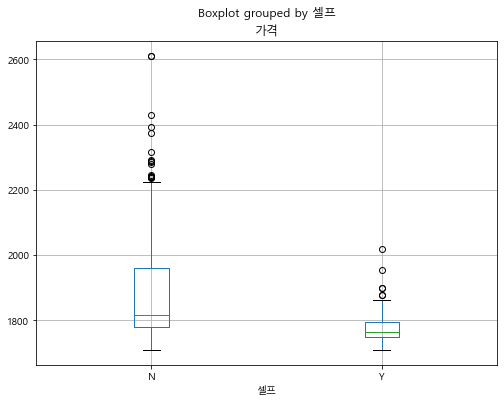

In [47]:
stations.boxplot(by="셀프", column="가격", figsize=(8,6))
#셀프인 경우가 아닐때보다 가격이 더 저렴하다, 셀프인곳과 셀프가 아닌곳의 최고요금이 많이 차이가 남(최저는 비슷, 검은색 선)
#네모박스가 데이터가 많이 몰려있다는 의미, 가운데 초록색 선은 중앙값

+ 주유소의 상표별로 얼마나 저렴한가?

C:\Users\ch002\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ch002\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='상표', ylabel='가격'>

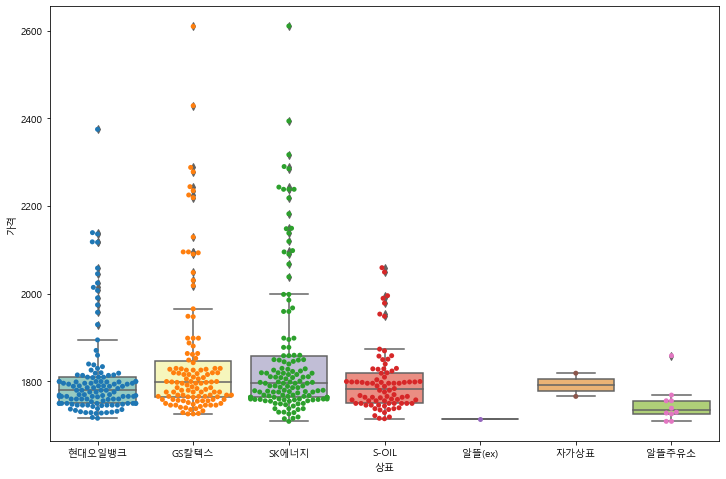

In [50]:
plt.figure(figsize=(12,8))

sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations)

+ 구별 주유 가격 확인

In [52]:
##### 서울시에서 가장 주유가격이 비싼 곳은 어디인가?(10개만 확인)
stations.sort_values(by="가격", ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
288,서남주유소,서울 중구 통일로 30,2611.0,N,SK에너지,중구
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2610.0,N,GS칼텍스,용산구
287,필동주유소,서울 중구 퇴계로 196 (필동2가),2429.0,N,GS칼텍스,중구
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2394.0,N,SK에너지,중구
463,제이제이주유소,서울 강남구 언주로 716,2375.0,N,현대오일뱅크,강남구
102,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2317.0,N,SK에너지,서초구
252,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
462,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구
461,SK논현주유소,서울 강남구 논현로 747 (논현동),2285.0,N,SK에너지,강남구
384,구로주유소,서울 구로구 구로동로 137 (구로동),2278.0,N,GS칼텍스,구로구


In [53]:
#### 서울시에서 가장 주유가격이 싼 곳은 어디인가?(10개만 확인)
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
304,화곡역주유소,서울 강서구 강서로 154 (화곡동),1708.0,Y,알뜰주유소,강서구
176,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1708.0,N,SK에너지,양천구
303,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1708.0,N,알뜰주유소,강서구
178,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1714.0,Y,SK에너지,양천구
70,만남의광장주유소,서울 서초구 양재대로12길 73-71,1714.0,Y,알뜰(ex),서초구
177,현대주유소,서울 양천구 남부순환로 372 (신월동),1714.0,Y,S-OIL,양천구
413,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1715.0,Y,S-OIL,도봉구
412,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1715.0,Y,현대오일뱅크,도봉구
14,동서울고속주유소,서울 동대문구 한천로 414,1715.0,Y,SK에너지,동대문구
414,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1717.0,N,현대오일뱅크,도봉구


+ 구별로 평균값 산출

In [56]:
gu_mean = stations.pivot_table(index=['구'], values=['가격'])
#stations.groupby(by="구").mean()
gu_mean.head()

,가격
구,
강남구,1961.588235
강동구,1835.928571
강북구,1753.615385
강서구,1788.156250
관악구,1813.214286


In [58]:
##### 구별 평균값을 지도로 표시

import folium
import json

map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"
geo_str=json.load(open(geo_path, encoding="utf-8"))

map.choropleth(geo_data=geo_str, data=gu_mean, key_on='feature.id',
              columns=[gu_mean.index, "가격"], fill_color="PuRd")

map

C:\Users\ch002\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


+ 주유가격 상하위 10개씩을 지도에 표시

In [63]:
oil_price_top10 = stations.sort_values(by="가격", ascending=False).head(10)
oil_price_bottom10 = stations.sort_values(by="가격").head(10)

oil_price_top10.head()

,Oil_store,주소,가격,셀프,상표,구
288,서남주유소,서울 중구 통일로 30,2611.0,N,SK에너지,중구
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2610.0,N,GS칼텍스,용산구
287,필동주유소,서울 중구 퇴계로 196 (필동2가),2429.0,N,GS칼텍스,중구
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2394.0,N,SK에너지,중구
463,제이제이주유소,서울 강남구 언주로 716,2375.0,N,현대오일뱅크,강남구


In [70]:
import requests

header = {"Authorization" : "KakaoAK c5e7aca4b4d7f877476cd85bbf098bb3"}
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format("서울특별시 용산구 청파로 367")

requests.get(url, headers=header).json()["documents"][0]["x"] #x는 경도

'126.968973680782'

In [69]:
print(oil_price_top10["주소"][253])
print("----------------------------------------")
print(oil_price_top10["주소"][253].split(" (")[0])

서울특별시 용산구  청파로 367 (청파동)
----------------------------------------
서울특별시 용산구  청파로 367


In [71]:
##### 상위 10개에 위도, 경도 추가

lat=[]
lng=[]

for n in oil_price_top10.index:
    tmp_addr=oil_price_top10["주소"][n].split(" (")[0]
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(tmp_addr)
    
    lat.append(requests.get(url, headers=header).json()["documents"][0]["y"])
    lng.append(requests.get(url, headers=header).json()["documents"][0]["x"])    

In [72]:
oil_price_top10["lat"]=lat
oil_price_top10["lng"]=lng

oil_price_top10.head()

,Oil_store,주소,가격,셀프,상표,구,lat,lng
288,서남주유소,서울 중구 통일로 30,2611.0,N,SK에너지,중구,37.5583624710728,126.972067727197
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2610.0,N,GS칼텍스,용산구,37.552339430427,126.968973680782
287,필동주유소,서울 중구 퇴계로 196 (필동2가),2429.0,N,GS칼텍스,중구,37.560888397210455,126.99367314920487
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2394.0,N,SK에너지,중구,37.5617003302134,126.99714213387709
463,제이제이주유소,서울 강남구 언주로 716,2375.0,N,현대오일뱅크,강남구,37.51765678484796,127.03571645912207


In [73]:
##### 하위 10개에 위도, 경도 추가

lat=[]
lng=[]

for n in oil_price_bottom10.index:
    tmp_addr=oil_price_bottom10["주소"][n].split(" (")[0]
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(tmp_addr)
    
    lat.append(requests.get(url, headers=header).json()["documents"][0]["y"])
    lng.append(requests.get(url, headers=header).json()["documents"][0]["x"])    

In [74]:
oil_price_bottom10["lat"]=lat
oil_price_bottom10["lng"]=lng

oil_price_bottom10.head()

,Oil_store,주소,가격,셀프,상표,구,lat,lng
304,화곡역주유소,서울 강서구 강서로 154 (화곡동),1708.0,Y,알뜰주유소,강서구,37.5406250950297,126.841525355833
176,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1708.0,N,SK에너지,양천구,37.5370183706843,126.834287158433
303,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1708.0,N,알뜰주유소,강서구,37.53154989241573,126.85604195207029
178,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1714.0,Y,SK에너지,양천구,37.516736727649366,126.85473678924637
70,만남의광장주유소,서울 서초구 양재대로12길 73-71,1714.0,Y,알뜰(ex),서초구,37.4594852424923,127.043140747618


In [77]:
map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)

for n in oil_price_top10.index:
    folium.CircleMarker(location=[oil_price_top10["lat"][n], oil_price_top10["lng"][n]],
                       radius=10, color="#CD3181", fill_color="#CD3181", fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    folium.CircleMarker(location=[oil_price_bottom10["lat"][n], oil_price_bottom10["lng"][n]],
                       radius=10, color="#3186CC", fill_color="#3186CC", fill=True).add_to(map)
    
map